# Linear Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_stats_salary_19-20')
rbs.head()

,NAME,ATT,YDS/ATT,ATT/G,100+ YDS,TD,LONG,FUM,FUML,ATT_rank,YDS/ATT_rank,ATT/G_rank,100+ YDS_rank,TD_rank,LONG_rank,FUM_rank,FUML_rank,salary
0,Trey Edmunds,22,4.2,2.0,0,0,45,0,0,90.5,47.0,93.5,68.5,86.0,26.5,18.0,22.5,690000
1,Tra Carson,18,2.7,6.0,0,0,12,0,0,93.5,94.0,54.0,68.5,86.0,92.0,18.0,22.5,685000
2,Ezekiel Elliott,301,4.5,18.8,7,12,33,3,2,2.0,33.5,2.0,1.5,5.5,45.5,84.5,86.5,15000000
3,Todd Gurley,217,3.8,15.5,0,12,25,3,2,17.5,65.5,13.0,68.5,5.5,60.0,84.5,86.5,14375000
4,Saquon Barkley,217,4.6,16.7,4,6,68,1,0,17.5,28.5,11.0,9.5,20.0,9.0,52.0,22.5,7798688


In [6]:
rbs.columns

Index(['NAME', 'ATT', 'YDS/ATT', 'ATT/G', '100+ YDS', 'TD', 'LONG', 'FUM',
       'FUML', 'ATT_rank', 'YDS/ATT_rank', 'ATT/G_rank', '100+ YDS_rank',
       'TD_rank', 'LONG_rank', 'FUM_rank', 'FUML_rank', 'salary'],
      dtype='object')

In [7]:
model = LinearRegression()

In [9]:
X = rbs[['ATT', 'YDS/ATT', 'ATT/G', '100+ YDS', 'TD',
         'FUM', 'FUML', 'LONG', ]]
y = rbs['salary']

In [10]:
X.shape

(54, 8)

In [11]:
y.shape

(54,)

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(X)

In [14]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [15]:
np.sqrt(MSE(y, y_pred))

3045640.230374428

In [16]:
model.intercept_

850375.5342309582

In [17]:
model.coef_

array([  19310.30037019,  249759.1336128 ,   19574.45172191,
       -194741.52426587,  148563.98790975, -337028.97967519,
       1096308.51022708,  -61386.02390812])

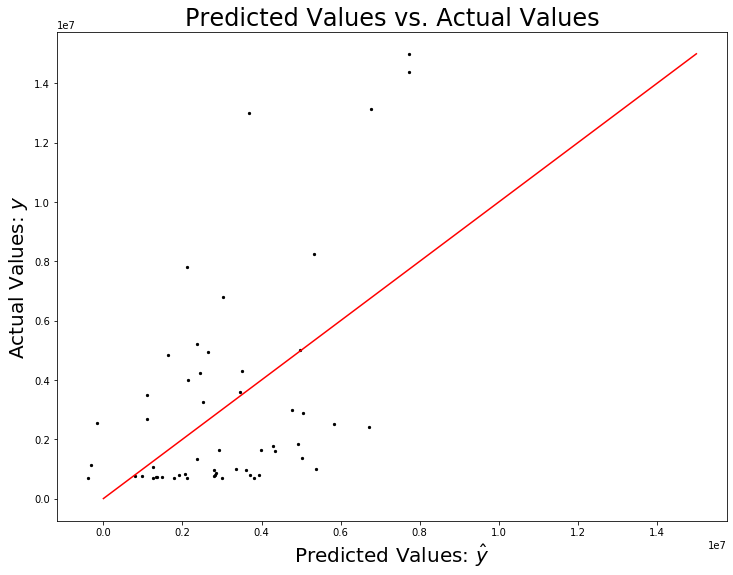

In [18]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [19]:
r2_score(y, y_pred)

0.27480361863650515